In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!echo '{"username":"kushgabani","key":"b7e66dad2858a34351f0dadd9c1fb1e1"}' > /root/.kaggle/kaggle.json
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

 98% 1.05G/1.08G [00:13<00:00, 80.2MB/s]
100% 1.08G/1.08G [00:13<00:00, 87.2MB/s]


In [ ]:
!unzip /content/the-simpsons-characters-dataset.zip -d DataSet

Streaming output truncated to the last 5000 lines.
  inflating: DataSet/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1270.jpg  
  inflating: DataSet/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: DataSet/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: DataSet/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: DataSet/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: DataSet/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: DataSet/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: DataSet/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: DataSet/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: DataSet/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: DataSet/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: DataSet/simpsons_dataset/simpsons_

In [ ]:
%tensorflow_version 2.x
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil

In [ ]:
training_path = "./DataSet/simpsons_dataset/"
testing_path = "./DataSet/kaggle_simpson_testset/"
CHARACTERS = os.listdir(training_path)
CHARACTERS.remove("simpsons_dataset")
shutil.rmtree(training_path + "simpsons_dataset")
CHARACTERS = sorted(CHARACTERS)
CHARACTERS

['abraham_grampa_simpson',
 'agnes_skinner',
 'apu_nahasapeemapetilon',
 'barney_gumble',
 'bart_simpson',
 'carl_carlson',
 'charles_montgomery_burns',
 'chief_wiggum',
 'cletus_spuckler',
 'comic_book_guy',
 'disco_stu',
 'edna_krabappel',
 'fat_tony',
 'gil',
 'groundskeeper_willie',
 'homer_simpson',
 'kent_brockman',
 'krusty_the_clown',
 'lenny_leonard',
 'lionel_hutz',
 'lisa_simpson',
 'maggie_simpson',
 'marge_simpson',
 'martin_prince',
 'mayor_quimby',
 'milhouse_van_houten',
 'miss_hoover',
 'moe_szyslak',
 'ned_flanders',
 'nelson_muntz',
 'otto_mann',
 'patty_bouvier',
 'principal_skinner',
 'professor_john_frink',
 'rainier_wolfcastle',
 'ralph_wiggum',
 'selma_bouvier',
 'sideshow_bob',
 'sideshow_mel',
 'snake_jailbird',
 'troy_mcclure',
 'waylon_smithers']

In [ ]:
os.remove("./DataSet/annotation.txt")
os.remove("./DataSet/characters_illustration.png")
os.remove("./DataSet/number_pic_char.csv")
os.remove("./DataSet/weights.best.hdf5")

In [ ]:
character_count = {}
to_be_removed = []
print("Characters removed from the set because of Under-Sampling")
for char in CHARACTERS:
  for r, _, files in os.walk(training_path + char):
    samples = len(files)
    # if samples < 200:
    #   print(char + " : " + str(samples))
    #   to_be_removed.append(char)
    #   CHARACTERS.remove(char)
    # else:
    character_count[char] = samples

CHARACTERS

Characters removed from the set because of Under-Sampling


['abraham_grampa_simpson',
 'agnes_skinner',
 'apu_nahasapeemapetilon',
 'barney_gumble',
 'bart_simpson',
 'carl_carlson',
 'charles_montgomery_burns',
 'chief_wiggum',
 'cletus_spuckler',
 'comic_book_guy',
 'disco_stu',
 'edna_krabappel',
 'fat_tony',
 'gil',
 'groundskeeper_willie',
 'homer_simpson',
 'kent_brockman',
 'krusty_the_clown',
 'lenny_leonard',
 'lionel_hutz',
 'lisa_simpson',
 'maggie_simpson',
 'marge_simpson',
 'martin_prince',
 'mayor_quimby',
 'milhouse_van_houten',
 'miss_hoover',
 'moe_szyslak',
 'ned_flanders',
 'nelson_muntz',
 'otto_mann',
 'patty_bouvier',
 'principal_skinner',
 'professor_john_frink',
 'rainier_wolfcastle',
 'ralph_wiggum',
 'selma_bouvier',
 'sideshow_bob',
 'sideshow_mel',
 'snake_jailbird',
 'troy_mcclure',
 'waylon_smithers']

In [ ]:
os.rename(training_path, "./DataSet/train/")
os.rename(testing_path, "./DataSet/test/")

training_path = "./DataSet/train/"
testing_path = "./DataSet/test/"

shutil.move(testing_path + "kaggle_simpson_testset", "./DataSet")
shutil.rmtree(testing_path)
os.rename("./DataSet/kaggle_simpson_testset", testing_path)

shutil.rmtree("./sample_data")

In [ ]:
import cv2
from keras.utils import to_categorical

character_map = dict(zip(np.arange(len(CHARACTERS)), CHARACTERS))

X_train = []
y_train = []

X_test = []
y_labels = []

CHARACTER_COUNT = len(CHARACTERS)

IMG_WIDTH = IMG_HEIGHT = 100

for num_map, character in character_map.items():
  for r, _, files in os.walk(training_path + character):
    for image in files:
      img = cv2.imread(training_path + character + "/" + image)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
      X_train.append(img)
      y_train.append(num_map)

X_train = np.array(X_train)
y_train = to_categorical(np.array(y_train), len(np.unique(y_train)))

for r, _, files in os.walk(testing_path):
  for image in files:
      img = cv2.imread(testing_path + image)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
      X_test.append(img)
      filename = '_'.join(image.split("_")[:-1])
      y_labels.append(filename)

X_test = np.array(X_test)
y_test = np.zeros((len(X_test), y_train.shape[1]))

for i, label in enumerate(y_labels):
  lbl_index = list(character_map.values()).index(label)
  y_test[i][lbl_index] = 1

((20933, 42), (990, 42), 42)


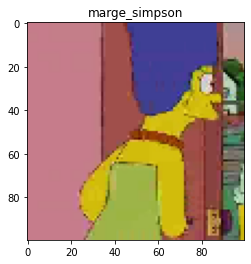

In [ ]:
plt.imshow(X_train[12340])
plt.title(character_map[list(y_train[12340]).index(1)])
print((y_train.shape, y_test.shape, len(CHARACTERS)))

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator

# batch_size = 32
# data_augment = ImageDataGenerator(brightness_range = [0.4, 1],
#                              horizontal_flip = True,
#                              rotation_range = 20,
#                             #  rescale = 1./255.,
#                              zoom_range =  0.3,
#                              width_shift_range = 0.15,
#                              height_shift_range = 0.15)

# data_augment.fit(X_train)

# train_iterator = data_augment.flow(X_train, y_train, batch_size = batch_size, shuffle = True)

# test_iterator = ImageDataGenerator(horizontal_flip = True).flow(X_test, y_test)

# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2)

In [ ]:
character_count

{'abraham_grampa_simpson': 913,
 'agnes_skinner': 42,
 'apu_nahasapeemapetilon': 623,
 'barney_gumble': 106,
 'bart_simpson': 1342,
 'carl_carlson': 98,
 'charles_montgomery_burns': 1193,
 'chief_wiggum': 986,
 'cletus_spuckler': 47,
 'comic_book_guy': 469,
 'disco_stu': 8,
 'edna_krabappel': 457,
 'fat_tony': 27,
 'gil': 27,
 'groundskeeper_willie': 121,
 'homer_simpson': 2246,
 'kent_brockman': 498,
 'krusty_the_clown': 1206,
 'lenny_leonard': 310,
 'lionel_hutz': 3,
 'lisa_simpson': 1354,
 'maggie_simpson': 128,
 'marge_simpson': 1291,
 'martin_prince': 71,
 'mayor_quimby': 246,
 'milhouse_van_houten': 1079,
 'miss_hoover': 17,
 'moe_szyslak': 1452,
 'ned_flanders': 1454,
 'nelson_muntz': 358,
 'otto_mann': 32,
 'patty_bouvier': 72,
 'principal_skinner': 1194,
 'professor_john_frink': 65,
 'rainier_wolfcastle': 45,
 'ralph_wiggum': 89,
 'selma_bouvier': 103,
 'sideshow_bob': 877,
 'sideshow_mel': 40,
 'snake_jailbird': 55,
 'troy_mcclure': 8,
 'waylon_smithers': 181}

In [ ]:
from imblearn.over_sampling import RandomOverSampler
print("X_train's shape before : " + str(X_train.shape))
print("y_train's shape before : " + str(y_train.shape))

ros = RandomOverSampler(sampling_strategy = "minority", random_state = 42)
X_train, y_train = ros.fit_sample(X_train.reshape(len(X_train), IMG_WIDTH * IMG_HEIGHT * 3), y_train)

X_train = X_train.reshape(-1, 100, 100, 3)

print("X_train's shape after : " + str(X_train.shape))
print("y_train's shape after : " + str(y_train.shape))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


X_train's shape before : (20933, 100, 100, 3)
y_train's shape before : (20933, 42)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


X_train's shape after : (23176, 100, 100, 3)
y_train's shape after : (23176, 42)


In [ ]:
modified_character_counts = dict(zip(list(CHARACTERS), [0 for char in CHARACTERS]))
for y in y_train:
  character = CHARACTERS[np.argmax(y)]
  modified_character_counts[character] += 1
modified_character_counts

{'abraham_grampa_simpson': 913,
 'agnes_skinner': 42,
 'apu_nahasapeemapetilon': 623,
 'barney_gumble': 106,
 'bart_simpson': 1342,
 'carl_carlson': 98,
 'charles_montgomery_burns': 1193,
 'chief_wiggum': 986,
 'cletus_spuckler': 47,
 'comic_book_guy': 469,
 'disco_stu': 8,
 'edna_krabappel': 457,
 'fat_tony': 27,
 'gil': 27,
 'groundskeeper_willie': 121,
 'homer_simpson': 2246,
 'kent_brockman': 498,
 'krusty_the_clown': 1206,
 'lenny_leonard': 310,
 'lionel_hutz': 2246,
 'lisa_simpson': 1354,
 'maggie_simpson': 128,
 'marge_simpson': 1291,
 'martin_prince': 71,
 'mayor_quimby': 246,
 'milhouse_van_houten': 1079,
 'miss_hoover': 17,
 'moe_szyslak': 1452,
 'ned_flanders': 1454,
 'nelson_muntz': 358,
 'otto_mann': 32,
 'patty_bouvier': 72,
 'principal_skinner': 1194,
 'professor_john_frink': 65,
 'rainier_wolfcastle': 45,
 'ralph_wiggum': 89,
 'selma_bouvier': 103,
 'sideshow_bob': 877,
 'sideshow_mel': 40,
 'snake_jailbird': 55,
 'troy_mcclure': 8,
 'waylon_smithers': 181}

In [ ]:
%%time
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau

np.random.seed(42)

num_classes = len(CHARACTERS)
model = Sequential([
                    Conv2D(32, (3, 3), activation = "relu", padding = "same", input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)),
                    MaxPool2D((2, 2)),
                    Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                    Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                    MaxPool2D((2, 2)),
                    Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                    MaxPool2D((2, 2)),
                    Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                    Conv2D(128, (3, 3), padding = "same", activation = "relu"),
                    MaxPool2D((2, 2)),
                    Conv2D(128, (3, 3), padding = "same", activation = "relu"),
                    Flatten(),
                    Dense(70, activation = "relu"),
                    Dropout(0.3),
                    Dense(120, activation = "relu"),
                    Dropout(0.3),
                    Dense(num_classes, activation = "softmax")
                    ])

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

batch_size = 32
history = model.fit(X_train, y_train,
                    epochs = 20,
                    batch_size = batch_size,
                    validation_data = (X_test, y_test))

Epoch 1/20
655/655 [==============================] - 24s 37ms/step - loss: 3.2124 - accuracy: 0.0998 - val_loss: 3.0929 - val_accuracy: 0.1091
Epoch 2/20
655/655 [==============================] - 23s 36ms/step - loss: 2.8888 - accuracy: 0.1683 - val_loss: 2.8229 - val_accuracy: 0.1505
Epoch 3/20
655/655 [==============================] - 23s 36ms/step - loss: 2.5164 - accuracy: 0.2844 - val_loss: 2.2303 - val_accuracy: 0.3303
Epoch 4/20
655/655 [==============================] - 23s 36ms/step - loss: 1.9456 - accuracy: 0.4454 - val_loss: 1.8848 - val_accuracy: 0.4182
Epoch 5/20
655/655 [==============================] - 23s 36ms/step - loss: 1.5054 - accuracy: 0.5685 - val_loss: 1.2843 - val_accuracy: 0.6404
Epoch 6/20
655/655 [==============================] - 23s 36ms/step - loss: 1.2147 - accuracy: 0.6579 - val_loss: 0.9101 - val_accuracy: 0.7434
Epoch 7/20
655/655 [==============================] - 23s 36ms/step - loss: 1.0427 - accuracy: 0.7149 - val_loss: 0.8270 - val_accuracy:

In [ ]:
%%time
# Hyperparameter tuning (optimizer)
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(optimizer = "adam"):
  num_classes = len(CHARACTERS)
  model = Sequential([
                      Conv2D(32, (3, 3), activation = "relu", padding = "same", input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)),
                      MaxPool2D((2, 2)),
                      Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                      Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                      MaxPool2D((2, 2)),
                      Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                      MaxPool2D((2, 2)),
                      Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                      Conv2D(128, (3, 3), padding = "same", activation = "relu"),
                      MaxPool2D((2, 2)),
                      Conv2D(128, (3, 3), padding = "same", activation = "relu"),
                      Flatten(),
                      Dense(70, activation = "relu"),
                      Dropout(0.3),
                      Dense(120, activation = "relu"),
                      Dropout(0.3),
                      Dense(num_classes, activation = "softmax")
                      ])

  model.compile(optimizer = optimizer,
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])
  return model


model = KerasClassifier(build_fn = create_model, epochs = 30, batch_size = 32)
param_dist = {
                "optimizer" : ["sgd", "adam", "rmsprop"]
             }

gridCV = GridSearchCV(estimator = model,
                      param_grid = param_dist,
                      n_jobs = -1,
                      cv = 3)

grid_result = gridCV.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Adam came out to be the best optimizer out of Adam, Rmsprop, SGD

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/30
655/655 [==============================] - 10s 16ms/step - loss: 3.2066 - accuracy: 0.0983
Epoch 2/30
655/655 [==============================] - 10s 16ms/step - loss: 2.6623 - accuracy: 0.2364
Epoch 3/30
655/655 [==============================] - 10s 16ms/step - loss: 1.9636 - accuracy: 0.4325
Epoch 4/30
655/655 [==============================] - 10s 16ms/step - loss: 1.5341 - accuracy: 0.5569
Epoch 5/30
655/655 [==============================] - 10s 16ms/step - loss: 1.2291 - accuracy: 0.6456
Epoch 6/30
655/655 [==============================] - 10s 16ms/step - loss: 1.0445 - accuracy: 0.7036
Epoch 7/30
655/655 [==============================] - 10s 16ms/step - loss: 0.9337 - accuracy: 0.7419
Epoch 8/30
655/655 [==============================] - 10s 15ms/step - loss: 0.8094 - accuracy: 0.7772
Epoch 9/30
655/655 [==============================] - 10s 15ms/step - loss: 0.7415 - accuracy: 0.7964
Epoch 10/30
655/655 [==============================] - 10s 15ms/step - loss: 0.710

In [ ]:
%%time
# Hyperparameter tuning (batch_size, epochs)
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# del model

def create_model():
  num_classes = len(CHARACTERS)
  model = Sequential([
                      Conv2D(32, (3, 3), activation = "relu", padding = "same", input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)),
                      MaxPool2D((2, 2)),
                      Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                      Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                      MaxPool2D((2, 2)),
                      Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                      MaxPool2D((2, 2)),
                      Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                      Conv2D(128, (3, 3), padding = "same", activation = "relu"),
                      MaxPool2D((2, 2)),
                      Conv2D(128, (3, 3), padding = "same", activation = "relu"),
                      Flatten(),
                      Dense(70, activation = "relu"),
                      Dropout(0.3),
                      Dense(120, activation = "relu"),
                      Dropout(0.3),
                      Dense(num_classes, activation = "softmax")
                      ])

  model.compile(optimizer = "adam",
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])
  return model
seed = 42

model = KerasClassifier(build_fn = create_model, verbose = 1)
param_dist = {
                "batch_size" : [30, 50, 75],
                "epochs" : [20, 25, 30]
             }

randomCV = RandomizedSearchCV(estimator = model,
                              param_distributions = param_dist,
                              n_iter = 4,
                              n_jobs = -1,
                              cv = 2)

randomCV_result = randomCV.fit(X_train, y_train)

print("Best: %f using %s" % (randomCV_result.best_score_, randomCV_result.best_params_))
means = randomCV_result.cv_results_['mean_test_score']
stds = randomCV_result.cv_results_['std_test_score']
params = randomCV_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Hello! LOL
Epoch 1/30
401/401 [==============================] - 20s 50ms/step - loss: 2.9748 - accuracy: 0.1259
Epoch 2/30
401/401 [==============================] - 20s 50ms/step - loss: 2.3744 - accuracy: 0.2827
Epoch 3/30
401/401 [==============================] - 20s 50ms/step - loss: 1.8201 - accuracy: 0.4449
Epoch 4/30
401/401 [==============================] - 20s 50ms/step - loss: 1.4652 - accuracy: 0.5592
Epoch 5/30
401/401 [==============================] - 20s 50ms/step - loss: 1.1879 - accuracy: 0.6461
Epoch 6/30
401/401 [==============================] - 20s 49ms/step - loss: 1.0196 - accuracy: 0.6960
Epoch 7/30
401/401 [==============================] - 20s 49ms/step - loss: 0.8747 - accuracy: 0.7457
Epoch 8/30
401/401 [==============================] - 20s 50ms/step - loss: 0.7303 - accuracy: 0.7887
Epoch 9/30
401/401 [==============================] - 20s 50ms/step - loss: 0.6575 - accuracy: 0.8110
Epoch 10/30
401/401 [==============================] - 20s 49ms/step - 

In [ ]:
%%time
# Hyperparameter tuning (batch_size, epochs)
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

np.random.seed(42)
# del model

def create_model(dropout_rate = 0):
  num_classes = len(CHARACTERS)
  model = Sequential([
                      Conv2D(32, (3, 3), activation = "relu", padding = "same", input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)),
                      MaxPool2D((2, 2)),
                      Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                      Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                      MaxPool2D((2, 2)),
                      Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                      MaxPool2D((2, 2)),
                      Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                      Conv2D(128, (3, 3), padding = "same", activation = "relu"),
                      MaxPool2D((2, 2)),
                      Conv2D(128, (3, 3), padding = "same", activation = "relu"),
                      Flatten(),
                      Dense(70, activation = "relu"),
                      Dropout(0.3),
                      Dense(120, activation = "relu"),
                      Dropout(dropout_rate),
                      Dense(num_classes, activation = "softmax")
                      ])

  model.compile(optimizer = "adam",
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])
  return model

model = KerasClassifier(build_fn = create_model, verbose = 1, epochs = 30, batch_size = 50)
param_dist = {
                "dropout_rate" : [0, 0.2, 0.4]
             }

gridCV = GridSearchCV(estimator = model,
                              param_grid = param_dist,
                              n_jobs = -1,
                              cv = 2)

gridcv_result = gridCV.fit(X_train, y_train)

print("Best: %f using %s" % (gridcv_result.best_score_, gridcv_result.best_params_))
means = gridcv_result.cv_results_['mean_test_score']
stds = gridcv_result.cv_results_['std_test_score']
params = gridcv_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Hello! LOL


In [ ]:
%%time
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from numpy.random import seed

# del model

num_classes = len(CHARACTERS)
model = Sequential([
                    Conv2D(32, (3, 3), activation = "relu", padding = "same", input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)),
                    MaxPool2D((2, 2)),
                    Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                    Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                    MaxPool2D((2, 2)),
                    Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                    MaxPool2D((2, 2)),
                    Conv2D(64, (3, 3), padding = "same", activation = "relu"),
                    Conv2D(128, (3, 3), padding = "same", activation = "relu"),
                    MaxPool2D((2, 2)),
                    Conv2D(128, (3, 3), padding = "same", activation = "relu"),
                    Flatten(),
                    Dense(70, activation = "relu"),
                    Dropout(0.3),
                    Dense(120, activation = "relu"),
                    Dropout(0.3),
                    Dense(num_classes, activation = "softmax")
                    ])

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              min_lr=0.0001,
                              verbose = 1,
                              mode = "min")

batch_size = 50
history = model.fit(X_train, y_train,
                    epochs = 30,
                    batch_size = batch_size,
                    validation_data = (X_test, y_test),
                    callbacks = [reduce_lr])

Epoch 1/30
464/464 [==============================] - 11s 23ms/step - loss: 2.8616 - accuracy: 0.2036 - val_loss: 2.6413 - val_accuracy: 0.2525
Epoch 2/30
464/464 [==============================] - 10s 23ms/step - loss: 2.0984 - accuracy: 0.4055 - val_loss: 1.8594 - val_accuracy: 0.4253
Epoch 3/30
464/464 [==============================] - 10s 23ms/step - loss: 1.5700 - accuracy: 0.5497 - val_loss: 1.4179 - val_accuracy: 0.5636
Epoch 4/30
464/464 [==============================] - 11s 23ms/step - loss: 1.2332 - accuracy: 0.6445 - val_loss: 1.1792 - val_accuracy: 0.6455
Epoch 5/30
464/464 [==============================] - 11s 23ms/step - loss: 1.0237 - accuracy: 0.7132 - val_loss: 0.8727 - val_accuracy: 0.7465
Epoch 6/30
464/464 [==============================] - 11s 23ms/step - loss: 0.8735 - accuracy: 0.7525 - val_loss: 0.6919 - val_accuracy: 0.8010
Epoch 7/30
464/464 [==============================] - 11s 23ms/step - loss: 0.7968 - accuracy: 0.7761 - val_loss: 0.5851 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss : " + str(test_loss))
print("Test Accuracy : " + str(test_acc))

31/31 [==============================] - 0s 9ms/step - loss: 0.0332 - accuracy: 0.9899
Test Loss : 0.033183753490448
Test Accuracy : 0.9898989796638489


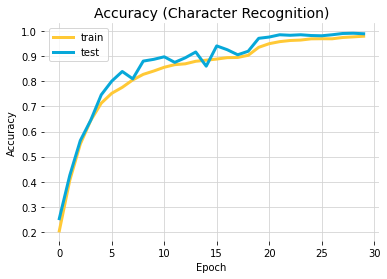

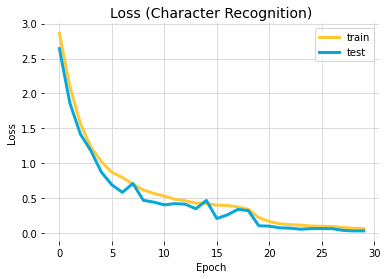

In [ ]:
from matplotlib import cycler
colors = cycler('color',
              ['#ffc936', '#07a8d9'])
plt.rc('axes', facecolor='#FFFFFF', edgecolor='none',
      axisbelow=True, grid=True, prop_cycle = colors)
plt.rc('grid', color='lightgray', linestyle='solid')
plt.rc('patch', edgecolor='#fafafa')
plt.rc('lines', linewidth=3)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Accuracy (Character Recognition)", fontsize = "14")
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss (Character Recognition)", fontsize = "14")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend(['train', 'test'])
plt.show();

Text(0, 0.5, 'True Positive Rate')

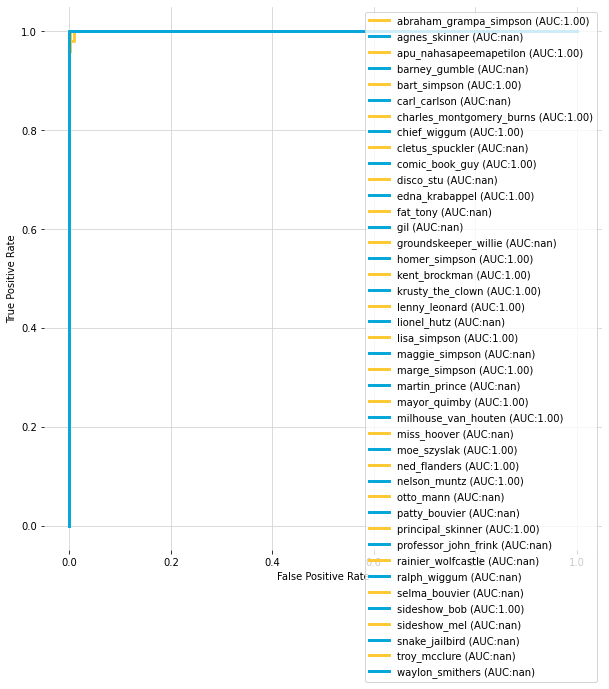

In [ ]:
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

y_preds = model.predict(X_test)

fig, ax = plt.subplots(figsize = (10, 10))
for i, val in enumerate(CHARACTERS):
    fpr, tpr, thresholds = roc_curve(y_test[:,i].astype(int), y_preds[:,i])
    ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (val, auc(fpr, tpr)))
ax.legend()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

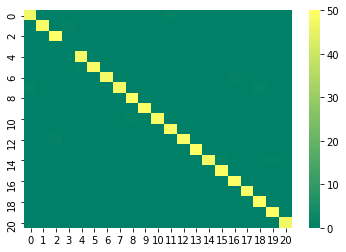

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
conf_matrix = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(y_preds, axis = 1))

sn.heatmap(conf_matrix, cmap = "summer")

In [ ]:
!pip install tensorflowjs
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

model = load_model("./character-recognition-model.h5");
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "./")

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [ ]:
!tensorflowjs_converter --input_format=keras ./character-recognition-model.h5 ./saved_model

2020-12-16 09:16:34.943177: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [ ]:
CHARACTERS = ['abraham_grampa_simpson',
 'agnes_skinner',
 'apu_nahasapeemapetilon',
 'barney_gumble',
 'bart_simpson',
 'carl_carlson',
 'charles_montgomery_burns',
 'chief_wiggum',
 'cletus_spuckler',
 'comic_book_guy',
 'disco_stu',
 'edna_krabappel',
 'fat_tony',
 'gil',
 'groundskeeper_willie',
 'homer_simpson',
 'kent_brockman',
 'krusty_the_clown',
 'lenny_leonard',
 'lionel_hutz',
 'lisa_simpson',
 'maggie_simpson',
 'marge_simpson',
 'martin_prince',
 'mayor_quimby',
 'milhouse_van_houten',
 'miss_hoover',
 'moe_szyslak',
 'ned_flanders',
 'nelson_muntz',
 'otto_mann',
 'patty_bouvier',
 'principal_skinner',
 'professor_john_frink',
 'rainier_wolfcastle',
 'ralph_wiggum',
 'selma_bouvier',
 'sideshow_bob',
 'sideshow_mel',
 'snake_jailbird',
 'troy_mcclure',
 'waylon_smithers']

import os
import numpy as np
import cv2
test_data = []
label = []

for file in list(os.listdir()):
    if file.split(".")[-1] in ["jpg", "png", "jpeg"]:
      img = cv2.imread("./" + file)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (100, 100))
      test_data.append(img)
      label.append(file.split(".")[:-1])

test_data = np.array(test_data)
prediction = model.predict(test_data)
count = 0
for pred in prediction:
  print("prediction : " + CHARACTERS[np.argmax(pred)] + " Actual : " + str(label[count]))
  count += 1

prediction : apu_nahasapeemapetilon Actual : ['gk4']
prediction : groundskeeper_willie Actual : ['gwk2']
prediction : groundskeeper_willie Actual : ['gkw3']
prediction : groundskeeper_willie Actual : ['sp']
prediction : groundskeeper_willie Actual : ['gkw']


In [ ]:
# Saving the model
model.save("character-recognition-model", save_format = "h5")